# Introduction

### Prologue

Welcome to the Computer Vision Assignment Nagar (CVAN), where everyone has to solve some set of problems to go from location A to location B. There are total 5 places (A, B, C, D, E) in the CVAN with equally distributed rewards.
<br/><br/>
After visiting all the 5 places you will able to reach a glorious palce ResultPura (RP).
<br/><br/>
Prof. Shanmuganathan Raman is Time Variant Authority (TVA) of this universe, if found you copying the assignment or exam or any malpractice then instead of reaching ResultPura you will reach ZeroPura.
<br/><br/>
<b>Special fact about CVAN is you have to solve everything with some vision algorithm.</b>

### Task

You are currently at place A. Your task is to solve series of questions given below which will lead you to the final task of solving a JigSaw puzzle mystery. Someone has altered the reality of CVAN and makes changes in the vision algorithm of the brain and because of it everyone is now observing real world as jigsaw images in their vision and causing chaos in their daily life.
<br/><br/>
<b>Note: Only you can save them by not copying the assignment from others and but you can discuss with your friends.</b>

# Task

### Pre-defined code

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

# Downloading all the required libraries


# Importing all the required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import style
from glob import glob
from natsort import natsorted
from tqdm import tqdm
style.use('ggplot')

Mounted at /content/drive


In [ ]:
# Loading all the images in the drive
gt_images = []

for files in tqdm(natsorted(glob('/content/drive/My Drive/ES666CV/images/A/*'))):
    gt_images.append(cv2.imread(files, 1))

gt_images = np.array(gt_images) # Only possible because all images are of same size

100%|██████████| 4/4 [00:01<00:00,  2.99it/s]


In [ ]:
def show_image_grid(images, M, N, title='Title'):
    # Assuming 'images' is a numpy array of shape (num_images, height, width, channels)
    fig, axes = plt.subplots(M, N, figsize=(N * 2, M * 2))

    if len(images.shape) < 4:
        images = np.expand_dims(images.copy(), axis=0)

    fig.suptitle(title)
    for i in range(M):
        for j in range(N):
            if M==1 and N==1:
                ax = axes
            elif M == 1 or N==1:
                ax = axes[max(i, j)]
            else:
                ax = axes[i, j]
            index = i * N + j
            if index < images.shape[0]:
                ax.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
            ax.axis('off')
    plt.tight_layout()
    plt.show()

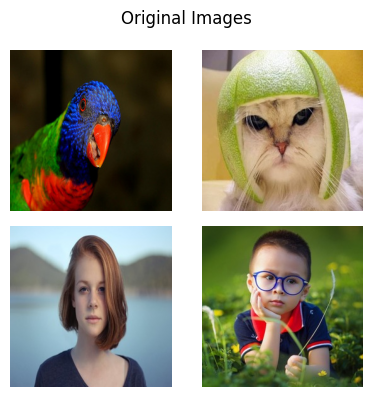

In [ ]:
show_image_grid(gt_images, 2, 2, 'Original Images')

### Q1 [2 Marks]

Given some set of images, you have to add two different kind of noises to it.
* Impulse noise (Salt and Pepper noise)
* Gaussian noise

<br/>
<b>Note: Implement all the noise addition algorithm from scratch.</b> You can use numpy library for convolution and other methods.
<br/><br/>
Add noises in small amount so that not all the information in image is changes.
<br/><br/>
Also please vary the parameters of noise and display images accordingly.

In [ ]:
def add_impulse_noise(image, noise_prob):
    noisy_image = np.copy(image)

    if len(image.shape) == 3: # If it's a color image
        for i in range(image.shape[2]):  # Iterate over each channel
            num_salt = np.ceil(noise_prob * image[:,:,i].size * 0.5)
            num_pepper = np.ceil(noise_prob * image[:,:,i].size * 0.5)

            # Salt (max intensity)
            coords_salt = [np.random.randint(0, dim - 1, int(num_salt)) for dim in image[:,:,i].shape]
            noisy_image[coords_salt[0], coords_salt[1], i] = 255

            # Pepper (min intensity)
            coords_pepper = [np.random.randint(0, dim - 1, int(num_pepper)) for dim in image[:,:,i].shape]
            noisy_image[coords_pepper[0], coords_pepper[1], i] = 0

    else: # Grayscale
        num_salt = np.ceil(noise_prob * image.size * 0.5)
        num_pepper = np.ceil(noise_prob * image.size * 0.5)

        # Salt (max intensity)
        coords_salt = [np.random.randint(0, dim - 1, int(num_salt)) for dim in image.shape]
        noisy_image[coords_salt[0], coords_salt[1]] = 255

        # Pepper (min intensity)
        coords_pepper = [np.random.randint(0, dim - 1, int(num_pepper)) for dim in image.shape]
        noisy_image[coords_pepper[0], coords_pepper[1]] = 0

    return noisy_image

def add_gaussian_noise(image, mean, std):
    noisy_image = np.copy(image).astype(np.float32)

    gaussian_noise = np.random.normal(mean, std, image.shape)
    noisy_image += gaussian_noise

    # Clip the values to stay in the valid range
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

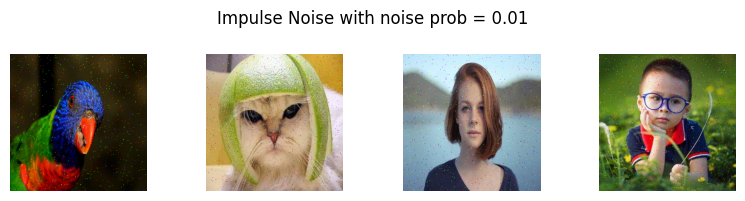

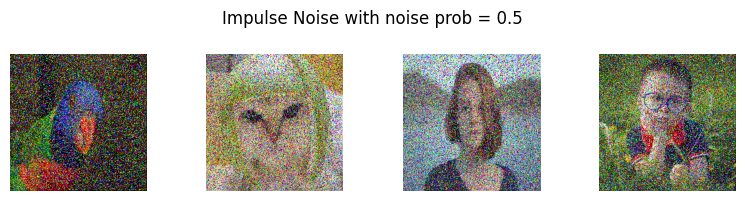

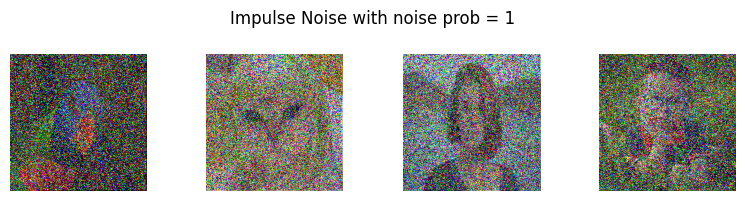

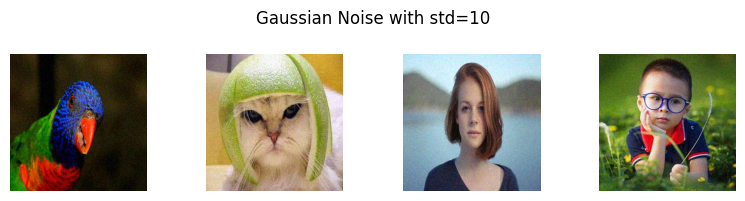

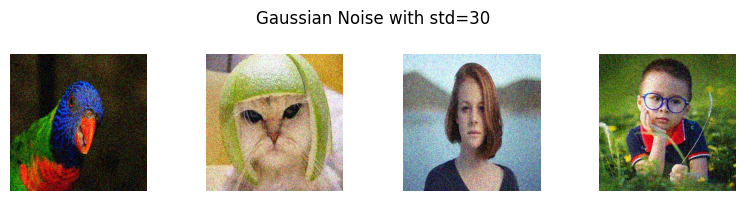

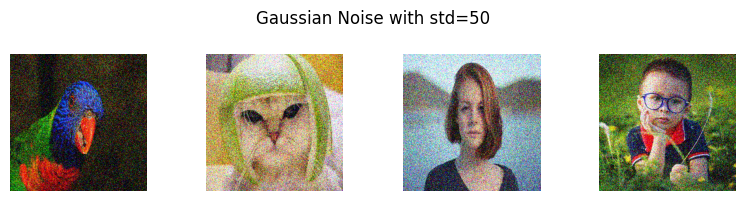

In [ ]:
# Variation in noise parameter
noise_probabilities = [0.01, 0.5, 1]
std_values = [10,30,50]

for noise_probability in noise_probabilities:
  impulse_noisy_imgs= []
  for image in gt_images:
    impulse_noisy_imgs.append(add_impulse_noise(image, noise_prob=noise_probability))
  show_image_grid(np.array(impulse_noisy_imgs), M=1, N=len(impulse_noisy_imgs), title=f'Impulse Noise with noise prob = {noise_probability}')

for std in std_values:
    gaussian_imgs = []
    for img in gt_images:
        gaussian_imgs.append(add_gaussian_noise(img, mean=0., std=std))
    show_image_grid(np.array(gaussian_imgs), M=1, N=len(gaussian_imgs), title=f'Gaussian Noise with std={std}')


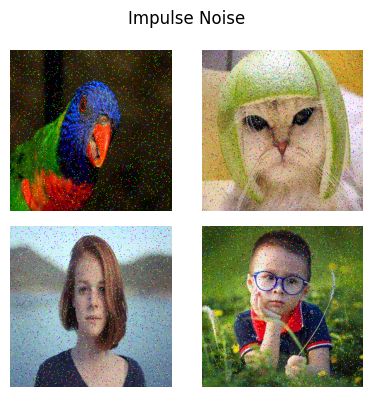

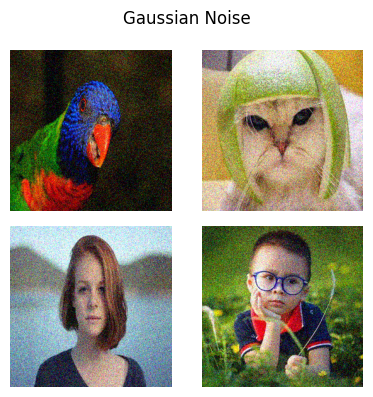

In [ ]:
impulse_noisy_images  = []
gaussian_noisy_images = []

for image in gt_images:
    impulse_noisy_images.append(add_impulse_noise(image, noise_prob=0.05))
    gaussian_noisy_images.append(add_gaussian_noise(image, mean=0., std=30))

impulse_noisy_images = np.array(impulse_noisy_images)
gaussian_noisy_images = np.array(gaussian_noisy_images)

show_image_grid(impulse_noisy_images, M=2, N=2, title='Impulse Noise')
show_image_grid(gaussian_noisy_images, M=2, N=2, title='Gaussian Noise')

### Q2 [3 Marks]

Use three different filtering operations and denoise the noisy images generated in the previous question. You have to use following noises value for this and rest of the question.
<pre>
noise_prob: 0.05 (impulse noise)
gaussian noise: mean = 0, std = 30
</pre>

* Box Filter: Moving Average Filter

[![boxfilter.webp](https://i.postimg.cc/4NtD4Z7k/boxfilter.webp)](https://postimg.cc/9rm816YJ)

* Gaussian Filter

[![gaussian.png](https://i.postimg.cc/Kvy9NTzw/gaussian.png)](https://postimg.cc/NLp7G5Rk)

* Median Filter

[![median.png](https://i.postimg.cc/q704Hqj5/median.png)](https://postimg.cc/NKNW1sh6)



<b>Note: Implement all the filters algorithm from scratch.</b> You can use numpy library for convolution and other methods.

In [ ]:
def apply_box_filter(image, kernel_size):
    # box filter kernel (moving average kernel)
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)

    # Apply convolution (filtering) for each channel
    blurred_image = np.zeros_like(image)
    for channel in range(image.shape[2]):  # Loop through each color channel
        padded_image = np.pad(image[:, :, channel], pad_width=kernel_size//2, mode='constant', constant_values = 0)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                region = padded_image[i:i+kernel_size, j:j+kernel_size]
                blurred_image[i, j, channel] = np.sum(region * kernel)

    blurred_image = blurred_image.astype(np.uint8)

    return blurred_image

In [ ]:
def apply_gaussian_filter(image, kernel_size, sigma):
    # Gaussian kernel (2D)
    ax = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    xx, yy = np.meshgrid(ax, ax)  # 2D grid of x and y values
    gauss_kernel = (1 / (2 * np.pi * sigma ** 2)) * np.exp(-(xx ** 2 + yy ** 2) / (2 * sigma ** 2))
    gauss_kernel /= np.sum(gauss_kernel)

    # Apply convolution (filtering) for each channel
    blurred_image = np.zeros_like(image)
    for channel in range(image.shape[2]):  # Loop through each color channel
        padded_image = np.pad(image[:, :, channel], pad_width=kernel_size//2,  mode='constant', constant_values = 0)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                region = padded_image[i:i+kernel_size, j:j+kernel_size]
                blurred_image[i, j, channel] = np.sum(region * gauss_kernel)

    blurred_image = blurred_image.astype(np.uint8)
    return blurred_image

In [ ]:
def apply_median_filter(image, kernel_size):

    if len(image.shape) == 2: # Grayscale image
        output_image = np.zeros_like(image)
        padded_image = np.pad(image, pad_width=kernel_size//2, mode='constant', constant_values=0) # Pad the image with zeros
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                region = padded_image[i:i+kernel_size, j:j+kernel_size]
                output_image[i, j] = np.median(region)

    else: # Color image
        output_image = np.zeros_like(image)
        channels = image.shape[2]
        # Apply the median filter to each channel separately
        for channel in range(channels):
            padded_image = np.pad(image[:, :, channel], pad_width=kernel_size//2, mode='constant', constant_values=0)
            for i in range(image.shape[0]):
                for j in range(image.shape[1]):
                    region = padded_image[i:i+kernel_size, j:j+kernel_size]
                    output_image[i, j, channel] = np.median(region)

    filtered_image = output_image.astype(np.uint8)
    return filtered_image

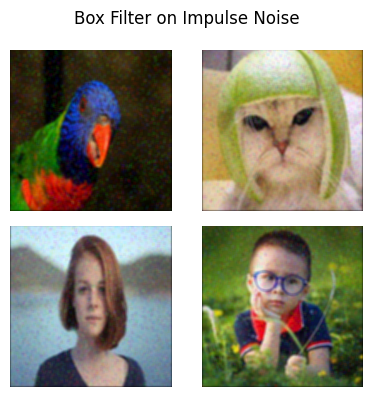

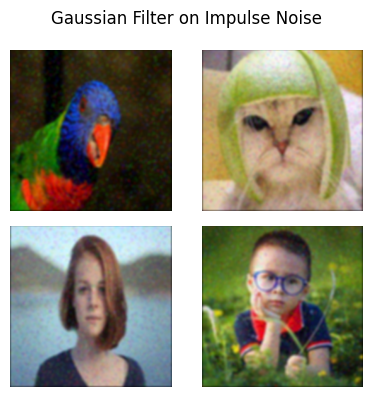

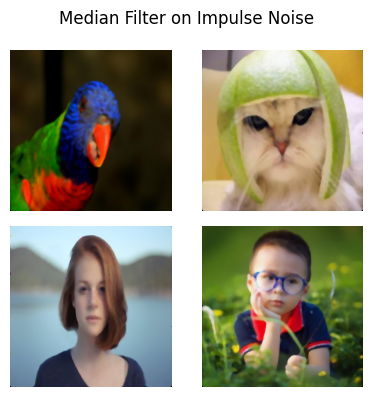

In [ ]:
box_filter_images_impulse       = []
gaussian_filter_images_impulse  = []
median_filter_images_impulse    = []

for image in impulse_noisy_images:
    box_filter_images_impulse.append(apply_box_filter(image, kernel_size=5))
    gaussian_filter_images_impulse.append(apply_gaussian_filter(image, kernel_size=7, sigma=2.0))
    median_filter_images_impulse.append(apply_median_filter(image, kernel_size=5))

box_filter_images_impulse = np.array(box_filter_images_impulse)
gaussian_filter_images_impulse = np.array(gaussian_filter_images_impulse)
median_filter_images_impulse = np.array(median_filter_images_impulse)

show_image_grid(box_filter_images_impulse, M=2, N=2, title='Box Filter on Impulse Noise')
show_image_grid(gaussian_filter_images_impulse, M=2, N=2, title='Gaussian Filter on Impulse Noise')
show_image_grid(median_filter_images_impulse, M=2, N=2, title='Median Filter on Impulse Noise')

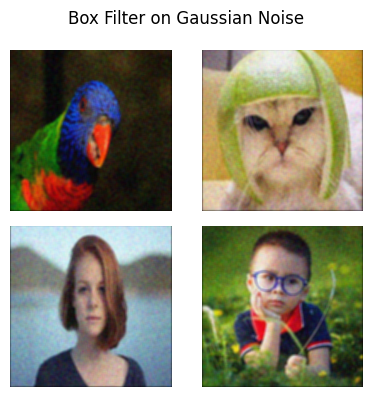

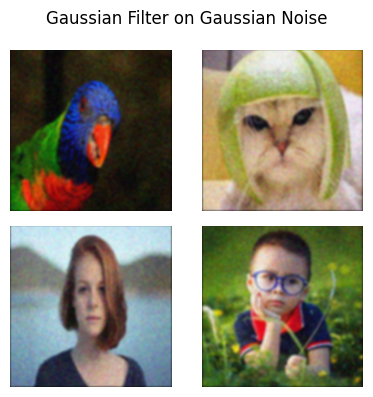

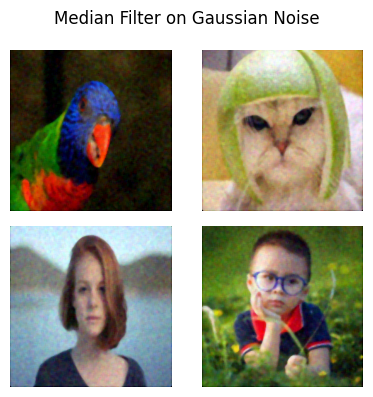

In [ ]:
box_filter_images_gaussian       = []
gaussian_filter_images_gaussian  = []
median_filter_images_gaussian    = []

for image in gaussian_noisy_images:
    box_filter_images_gaussian.append(apply_box_filter(image, kernel_size=5))
    gaussian_filter_images_gaussian.append(apply_gaussian_filter(image, kernel_size=7, sigma=2.0))
    median_filter_images_gaussian.append(apply_median_filter(image, kernel_size=5))

box_filter_images_gaussian = np.array(box_filter_images_gaussian)
gaussian_filter_images_gaussian = np.array(gaussian_filter_images_gaussian)
median_filter_images_gaussian = np.array(median_filter_images_gaussian)

show_image_grid(box_filter_images_gaussian, M=2, N=2, title='Box Filter on Gaussian Noise')
show_image_grid(gaussian_filter_images_gaussian, M=2, N=2, title='Gaussian Filter on Gaussian Noise')
show_image_grid(median_filter_images_gaussian, M=2, N=2, title='Median Filter on Gaussian Noise')

### Q3 [5 Marks]

Implement the Canny Edge Detector algorithm from scratch, you can use numpy library for computation operation such as convolution or sliding windows.
<br/>
Show canny edge results on the following denoised images from previous question:
* box_filter_images_impulse: [4, 256, 256, 3]
* gaussian_filter_images_impulse: [4, 256, 256, 3]
* median_filter_images_impulse: [4, 256, 256, 3]
* box_filter_images_gaussian: [4, 256, 256, 3]
* gaussian_filter_images_gaussian: [4, 256, 256, 3]
* median_filter_images_gaussian: [4, 256, 256, 3]

Total number of images in each of above array is: 4 <br/>
Each is of size H: 256, W: 256 and Channels: 3 <br/><br/>
Compare your implementation with Opencv canny edge detector method.<br/><br/>
Create a table of 6 x 4 (where 6 is all the filters and 4 is number of images) and show Root Mean Square Error between your canny edge image and opencv canny edge image.

In [ ]:
def apply_canny_edge_detector_opencv(image, threshold1, threshold2):

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the Canny edge detector
    edges = cv2.Canny(gray_image, threshold1, threshold2)

    # This is done only for converting 1 channel image to 3 channels for
    # visualization purpose in matplotlib
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    return edges

In [ ]:
def convert_rgb2gray(img):
    return np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])

def gaussian_blur(img, k_size, sigma):
    def gauss_kernel(size, sigma):
        kernel = np.fromfunction(lambda x, y: (1 / (2 * np.pi * sigma**2)) * np.exp(-((x - size // 2)**2 + (y - size // 2)**2) / (2 * sigma**2)), (size, size))
        return kernel / np.sum(kernel)

    kernel = gauss_kernel(k_size, sigma)
    pad_size = k_size // 2
    padded_img = np.pad(img, pad_size, mode='constant', constant_values=0)
    blurred_img = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            blurred_img[i, j] = np.sum(padded_img[i:i+k_size, j:j+k_size] * kernel)
    return blurred_img

def compute_gradients(img): # Using Sobel filters
    # Sobel filters for X and Y gradients
    sobel_filter_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_filter_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    # Gradient calculation using convolution
    grad_x = np.convolve(img.flatten(), sobel_filter_x.flatten(), mode='same').reshape(img.shape)
    grad_y = np.convolve(img.flatten(), sobel_filter_y.flatten(), mode='same').reshape(img.shape)

    # Compute gradient magnitude and direction
    grad_magnitude = np.hypot(grad_x, grad_y)
    grad_direction = np.arctan2(grad_y, grad_x)

    return grad_magnitude, grad_direction

def non_max_suppression(magnitude, direction): # To thin out edges
    rows, cols = magnitude.shape
    suppressed_img = np.zeros((rows, cols), dtype=np.int32)
    angle = direction * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            pixel1, pixel2 = 0, 0

            # Check the direction and interpolate between neighbors
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                pixel1 = magnitude[i, j + 1]
                pixel2 = magnitude[i, j - 1]
            elif 22.5 <= angle[i, j] < 67.5:
                pixel1 = magnitude[i + 1, j - 1]
                pixel2 = magnitude[i - 1, j + 1]
            elif 67.5 <= angle[i, j] < 112.5:
                pixel1 = magnitude[i + 1, j]
                pixel2 = magnitude[i - 1, j]
            elif 112.5 <= angle[i, j] < 157.5:
                pixel1 = magnitude[i - 1, j - 1]
                pixel2 = magnitude[i + 1, j + 1]

            # Suppress non-maxima
            if magnitude[i, j] >= pixel1 and magnitude[i, j] >= pixel2:
                suppressed_img[i, j] = magnitude[i, j]

    return suppressed_img

# Double thresholding to classify pixels into strong, weak, or non-edges.
def double_threshold(img, low_threshold, high_threshold):
    strong, weak = 255, 75
    result = np.zeros_like(img)

    strong_edges = img >= high_threshold
    weak_edges = (img >= low_threshold) & (img < high_threshold)

    result[strong_edges] = strong
    result[weak_edges] = weak

    return result

# Edge tracking using hysteresis to link weak edges to strong edges
def edge_tracking_by_hysteresis(image):
    strong, weak = 255, 75
    rows, cols = image.shape

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if image[i, j] == weak:
                # Check 8 neighboring pixels for strong edge connection
                if (image[i + 1, j] == strong or image[i - 1, j] == strong or
                    image[i, j + 1] == strong or image[i, j - 1] == strong or
                    image[i + 1, j + 1] == strong or image[i - 1, j - 1] == strong or
                    image[i + 1, j - 1] == strong or image[i - 1, j + 1] == strong):
                    image[i, j] = strong
                else:
                    image[i, j] = 0

    return image

def apply_canny_edge_detector_self(img, threshold1, threshold2):
    gray_img = convert_rgb2gray(img)
    blurred_img = gaussian_blur(gray_img, k_size=5, sigma=1.4)
    mag, dir = compute_gradients(blurred_img)
    nms_img = non_max_suppression(mag, dir)
    suppressed_img  = double_threshold(nms_img, low_threshold = threshold1, high_threshold = threshold2)
    thresholded_img = edge_tracking_by_hysteresis(suppressed_img)
    edges = thresholded_img.astype(np.uint8)
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    return edges


In [ ]:
threshold1 = 80
threshold2 = 180

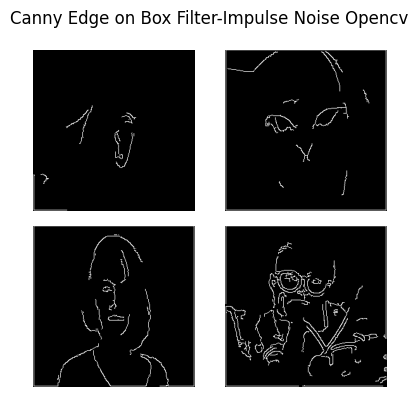

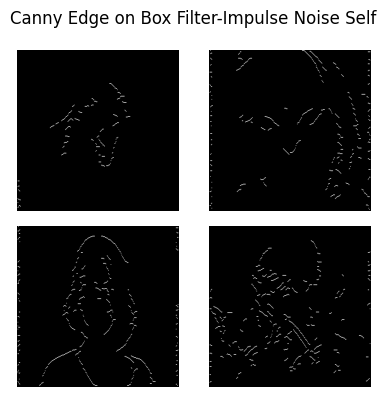

In [ ]:
canny_edge_opencv_box_filter_images_impulse = []
canny_edge_self_box_filter_images_impulse = []

for image in box_filter_images_impulse:
    canny_edge_opencv_box_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_box_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_box_filter_images_impulse = np.array(canny_edge_opencv_box_filter_images_impulse)
canny_edge_self_box_filter_images_impulse = np.array(canny_edge_self_box_filter_images_impulse)

show_image_grid(canny_edge_opencv_box_filter_images_impulse, M=2, N=2, title='Canny Edge on Box Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_box_filter_images_impulse, M=2, N=2, title='Canny Edge on Box Filter-Impulse Noise Self')

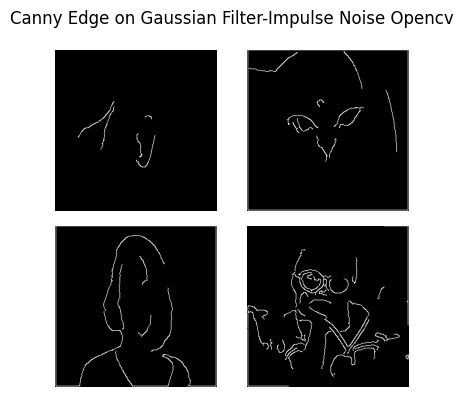

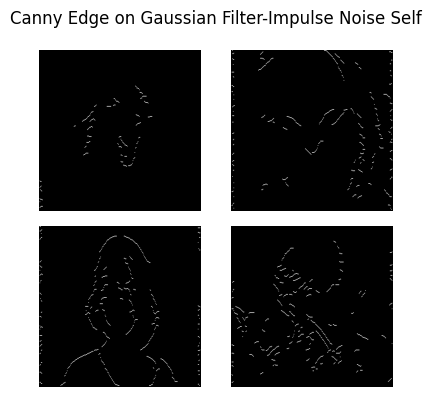

In [ ]:
canny_edge_opencv_gaussian_filter_images_impulse = []
canny_edge_self_gaussian_filter_images_impulse = []

for image in gaussian_filter_images_impulse:
    canny_edge_opencv_gaussian_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_gaussian_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_gaussian_filter_images_impulse = np.array(canny_edge_opencv_gaussian_filter_images_impulse)
canny_edge_self_gaussian_filter_images_impulse = np.array(canny_edge_self_gaussian_filter_images_impulse)

show_image_grid(canny_edge_opencv_gaussian_filter_images_impulse, M=2, N=2, title='Canny Edge on Gaussian Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_gaussian_filter_images_impulse, M=2, N=2, title='Canny Edge on Gaussian Filter-Impulse Noise Self')

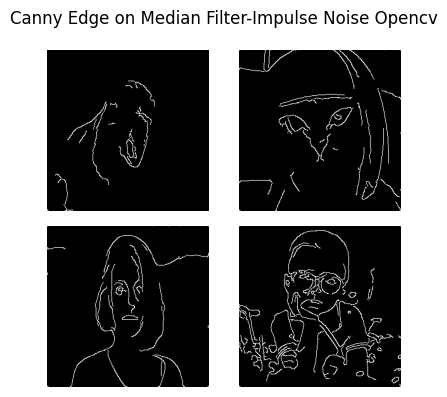

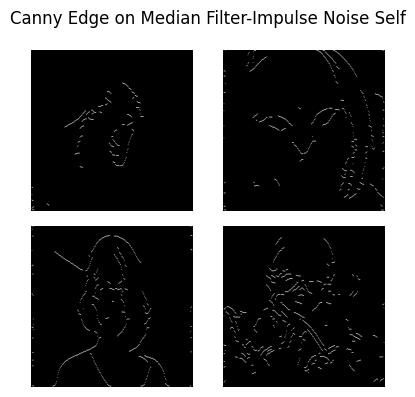

In [ ]:
canny_edge_opencv_median_filter_images_impulse = []
canny_edge_self_median_filter_images_impulse = []

for image in median_filter_images_impulse:
    canny_edge_opencv_median_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_median_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_median_filter_images_impulse = np.array(canny_edge_opencv_median_filter_images_impulse)
canny_edge_self_median_filter_images_impulse = np.array(canny_edge_self_median_filter_images_impulse)

show_image_grid(canny_edge_opencv_median_filter_images_impulse, M=2, N=2, title='Canny Edge on Median Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_median_filter_images_impulse, M=2, N=2, title='Canny Edge on Median Filter-Impulse Noise Self')

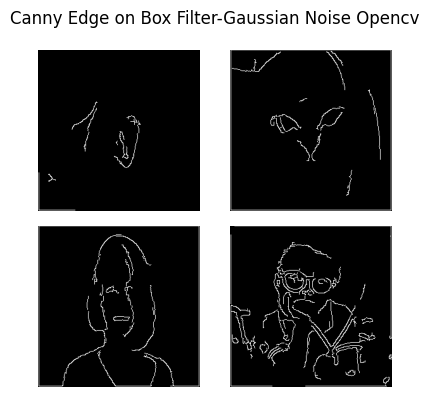

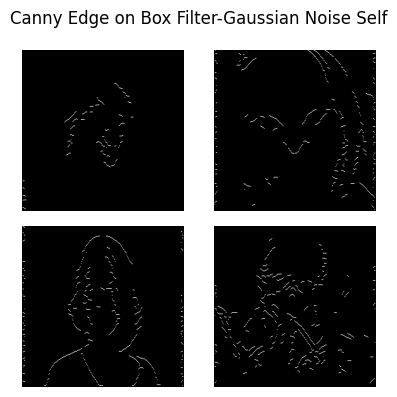

In [ ]:
canny_edge_opencv_box_filter_images_gaussian = []
canny_edge_self_box_filter_images_gaussian = []

for image in box_filter_images_gaussian:
    canny_edge_opencv_box_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_box_filter_images_gaussian.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_box_filter_images_gaussian = np.array(canny_edge_opencv_box_filter_images_gaussian)
canny_edge_self_box_filter_images_gaussian = np.array(canny_edge_self_box_filter_images_gaussian)

show_image_grid(canny_edge_opencv_box_filter_images_gaussian, M=2, N=2, title='Canny Edge on Box Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_box_filter_images_gaussian, M=2, N=2, title='Canny Edge on Box Filter-Gaussian Noise Self')

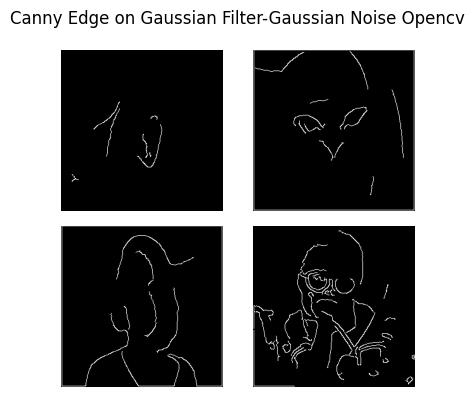

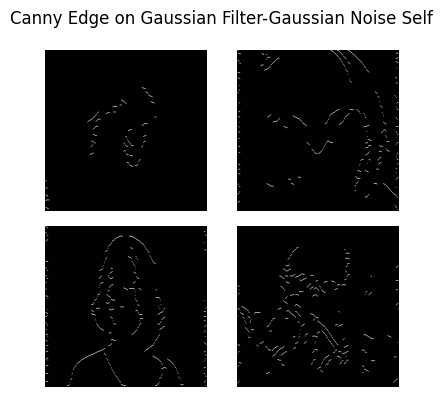

In [ ]:
canny_edge_opencv_gaussian_filter_images_gaussian = []
canny_edge_self_gaussian_filter_images_gaussian = []

for image in gaussian_filter_images_gaussian:
    canny_edge_opencv_gaussian_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_gaussian_filter_images_gaussian.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_gaussian_filter_images_gaussian = np.array(canny_edge_opencv_gaussian_filter_images_gaussian)
canny_edge_self_gaussian_filter_images_gaussian = np.array(canny_edge_self_gaussian_filter_images_gaussian)

show_image_grid(canny_edge_opencv_gaussian_filter_images_gaussian, M=2, N=2, title='Canny Edge on Gaussian Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_gaussian_filter_images_gaussian, M=2, N=2, title='Canny Edge on Gaussian Filter-Gaussian Noise Self')

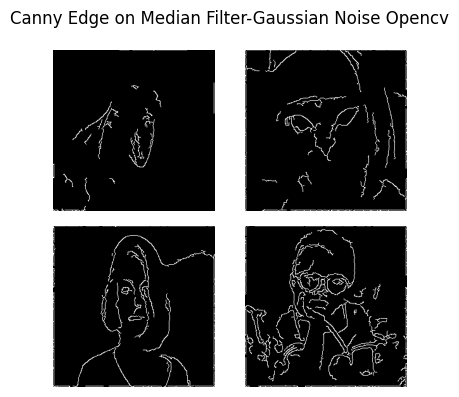

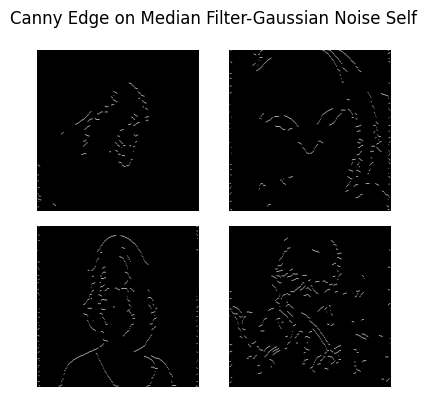

In [ ]:
canny_edge_opencv_median_filter_images_gaussian = []
canny_edge_self_median_filter_images_gaussian = []

for image in median_filter_images_gaussian:
    canny_edge_opencv_median_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_median_filter_images_gaussian.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_median_filter_images_gaussian = np.array(canny_edge_opencv_median_filter_images_gaussian)
canny_edge_self_median_filter_images_gaussian = np.array(canny_edge_self_median_filter_images_gaussian)

show_image_grid(canny_edge_opencv_median_filter_images_gaussian, M=2, N=2, title='Canny Edge on Median Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_median_filter_images_gaussian, M=2, N=2, title='Canny Edge on Median Filter-Gaussian Noise Self')

In [ ]:
####
# RMSE table of size 6 x 4
###

def rmse(image1, image2): # Root Mean Square Error between two images
    return np.sqrt(((image1 - image2) ** 2).mean())

# Lists of Canny edge detection results for each filter type
canny_edge_opencv_results = [
    canny_edge_opencv_box_filter_images_impulse,
    canny_edge_opencv_gaussian_filter_images_impulse,
    canny_edge_opencv_median_filter_images_impulse,
    canny_edge_opencv_box_filter_images_gaussian,
    canny_edge_opencv_gaussian_filter_images_gaussian,
    canny_edge_opencv_median_filter_images_gaussian
]

canny_edge_self_results = [
    canny_edge_self_box_filter_images_impulse,
    canny_edge_self_gaussian_filter_images_impulse,
    canny_edge_self_median_filter_images_impulse,
    canny_edge_self_box_filter_images_gaussian,
    canny_edge_self_gaussian_filter_images_gaussian,
    canny_edge_self_median_filter_images_gaussian
]

# To calculate RMSE values for each filter type and image
def calculate_rmse_for_all_filters(opencv_results, self_results):
    rmse_values = []
    for opencv_images, self_images in zip(opencv_results, self_results):
        filter_rmse = []
        for opencv_image, self_image in zip(opencv_images, self_images):
            filter_rmse.append(rmse(opencv_image, self_image))
        rmse_values.append(filter_rmse)
    return rmse_values

rmse_values = calculate_rmse_for_all_filters(canny_edge_opencv_results, canny_edge_self_results)

filter_names = [
    'Box Filter Impulse', 'Gaussian Filter Impulse', 'Median Filter Impulse',
    'Box Filter Gaussian', 'Gaussian Filter Gaussian', 'Median Filter Gaussian'
]
image_indices = [f'Image {i+1}' for i in range(4)]

# Print the RMSE table
print(f"{'Filter Type':<30}", end='')
for index in image_indices:
    print(f"{index:<11}", end=' ')
print()

for filter_name, rmse_row in zip(filter_names, rmse_values):
    print(f"{filter_name:<30}", end='')
    for value in rmse_row:
        print(f"{value: .6f}", end='  ')
    print()

Filter Type                   Image 1     Image 2     Image 3     Image 4     
Box Filter Impulse             0.101337   0.182092   0.185783   0.251218  
Gaussian Filter Impulse        0.083048   0.174911   0.176647   0.209121  
Median Filter Impulse          0.128015   0.178794   0.165912   0.250427  
Box Filter Gaussian            0.106834   0.185865   0.190607   0.252218  
Gaussian Filter Gaussian       0.086733   0.178067   0.177165   0.209121  
Median Filter Gaussian         0.139317   0.211840   0.211299   0.278907  
